For Boston Airbnb data, go to: https://www.kaggle.com/airbnb/boston
<br>
For Seattle Airbnb data, go to: https://www.kaggle.com/airbnb/seattle

In [1]:
# Import useful libraries

# for computation

import numpy as np
import pandas as pd

# for visualization

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Listings, including full descriptions and average review score 
<br>
Reviews, including unique id for each reviewer and detailed comments <br>
Calendar, including listing id and the price and availability for that day

In [2]:
# reading the dataset

boston_listing = pd.read_csv('Boston_listings.csv')
boston_review = pd.read_csv('Boston_reviews.csv')
boston_calendar = pd.read_csv('Boston_calendar.csv')

seattle_listing = pd.read_csv('Seattle_listings.csv')
seattle_review = pd.read_csv('Seattle_reviews.csv')
seattle_calendar = pd.read_csv('Seattle_calendar.csv')

In [3]:
print(boston_listing.shape)
print(boston_review.shape)
print(boston_calendar.shape)

(3585, 95)
(68275, 6)
(1308890, 4)


In [4]:
# function to remove $ sign and return float

def str_to_float(string):
    """
    INPUT
    string - string of the price (ex : $250.00)
    
    OUTPUT
    float - returns float value of the price (ex: 250.0)
    """
    if string[:1] == '$':
        return float(string[1:].replace(',', ''))
    else:
        return np.nan

In [5]:
boston_listing["price"] = boston_listing["price"].apply(str_to_float) 

In [6]:
seattle_listing["price"] = seattle_listing["price"].apply(str_to_float) 

In [7]:
boston_listing.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,0.000000e+00,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [8]:
boston_listing.head(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25
5,12386020,https://www.airbnb.com/rooms/12386020,20160906204935,2016-09-07,Private Bedroom + Great Coffee,Super comfy bedroom plus your own bathroom in ...,Our sunny condo is located on the second and t...,Super comfy bedroom plus your own bathroom in ...,none,We love our corner of Roslindale! For quiet wa...,...,10.0,f,NaN,NaN,f,flexible,f,f,1,1.70
6,5706985,https://www.airbnb.com/rooms/5706985,20160906204935,2016-09-07,New Lrg Studio apt 15 min to Boston,It's a 5 minute walk to Rosi Square to catch t...,The whole house was recently redone and it 's ...,It's a 5 minute walk to Rosi Square to catch t...,none,Roslindale is the new hip area of Boston. Clos...,...,9.0,f,NaN,NaN,f,strict,f,f,3,4.00
7,2843445,https://www.airbnb.com/rooms/2843445,20160906204935,2016-09-07,"""Tranquility"" on ""Top of the Hill""","We can accommodate guests who are gluten-free,...",We provide a bedroom and full shared bath. Ra...,"We can accommodate guests who are gluten-free,...",none,Our neighborhood is residential with friendly ...,...,10.0,f,NaN,NaN,f,moderate,t,t,2,2.38
8,753446,https://www.airbnb.com/rooms/753446,20160906204935,2016-09-07,6 miles away from downtown Boston!,Nice and cozy apartment about 6 miles away to ...,Nice and cozy apartment about 6 miles away to ...,Nice and cozy apartment about 6 miles away to ...,none,Roslindale is a primarily residential neighbor...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,5.36
9,849408,https://www.airbnb.com/rooms/849408,20160906204935,2016-09-07,Perfect & Practical Boston Rental,This is a cozy and spacious two bedroom unit w...,Perfect apartment rental for those in town vis...,This is a cozy and spacious two bedroom unit w...,none,"This neighborhood truly has it all. Good, not...",...,9.0,f,NaN,NaN,f,strict,f,f,2,1.01


In [9]:
no_nulls = set(boston_listing.columns[boston_listing.isnull().mean()==0])
most_nulls = set(boston_listing.columns[boston_listing.isnull().mean() > 0.75])
print(boston_listing.columns)
print(no_nulls) #columns with no missing value
print(most_nulls) #columns with atleast 50% missing value

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [10]:
boston_listing_modified = boston_listing.drop(columns = most_nulls)

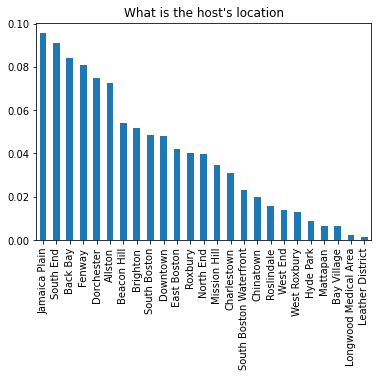

In [11]:
host_loc = boston_listing.neighbourhood_cleansed.value_counts()

(host_loc/boston_listing.shape[0]).plot(kind="bar");
plt.title("What is the host's location");

In [12]:
boston_listing.monthly_price.value_counts()

$3,500.00    30
$1,200.00    28
$3,000.00    26
$1,800.00    22
$1,500.00    21
             ..
$1,475.00     1
$1,799.00     1
$625.00       1
$9,395.00     1
$3,080.00     1
Name: monthly_price, Length: 288, dtype: int64

In [13]:
# percentage listing zipcode wise
boston_listing.zipcode.value_counts()/sum(boston_listing.zipcode.value_counts())

02116          0.109388
02130          0.093318
02118          0.069636
02215          0.066535
02134          0.065407
02114          0.065125
02127          0.050747
02135          0.048492
02115          0.047646
02128          0.041162
02125          0.036369
02120          0.032422
02113          0.028475
02119          0.028193
02111          0.027911
02129          0.025374
02124          0.022554
02210          0.021145
02108          0.020299
02131          0.018325
02109          0.014378
02122          0.012405
02132          0.010431
02136          0.008176
02121          0.008176
02126          0.006766
02110          0.003665
02145          0.003383
02446          0.002255
02143          0.001973
02139          0.001692
02138          0.001692
02467          0.001410
02445          0.001410
02163          0.000846
02141          0.000846
02108 02111    0.000282
02472          0.000282
02169          0.000282
02186          0.000282
02218          0.000282
02134-1704     0

<AxesSubplot:>

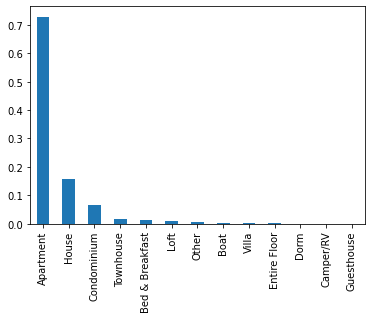

In [14]:
(boston_listing.property_type.value_counts()/boston_listing.property_type.value_counts().sum()).plot(kind= 'bar')

<AxesSubplot:xlabel='property_type'>

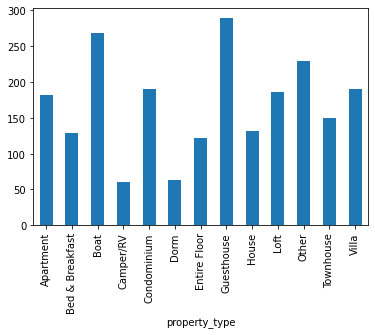

In [15]:
boston_listing.groupby(["property_type"]).mean()["price"].plot(kind='bar',legend=None)

<AxesSubplot:xlabel='room_type'>

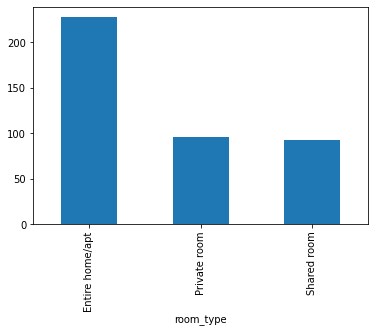

In [16]:
boston_listing.groupby(["room_type"]).mean()["price"].plot(kind='bar')

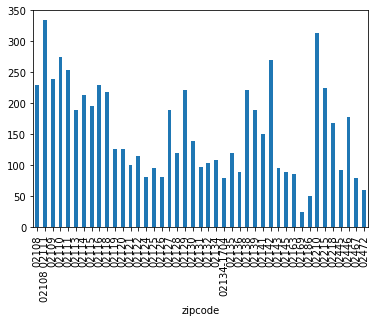

In [17]:
boston_listing.groupby(["zipcode"]).mean()["price"].plot(kind='bar');

In [18]:
boston_listing.property_type.isnull().sum()

3

In [19]:
boston_listing[boston_listing["host_location"] == "Cork, Cork, Ireland"]["latitude"]

925    42.338335
Name: latitude, dtype: float64

In [20]:
boston_listing[boston_listing["host_location"] == "San Isidro, Buenos Aires Province, Argentina"]["latitude"]

156    42.322672
Name: latitude, dtype: float64

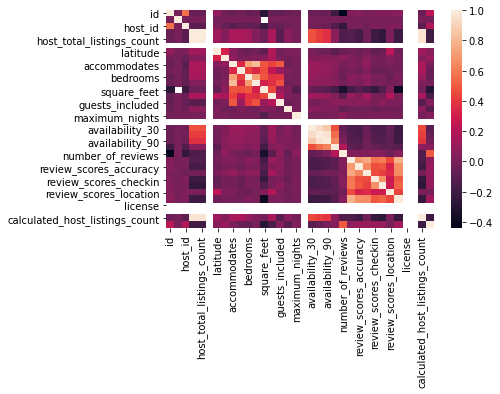

In [21]:
sns.heatmap(boston_listing.corr());

In [22]:
boston_listing[["number_of_reviews",'first_review', 'last_review', 'review_scores_rating']]

,number_of_reviews,first_review,last_review,review_scores_rating
0,0,NaN,NaN,NaN
1,36,2014-06-01,2016-08-13,94.0
2,41,2009-07-19,2016-08-05,98.0
3,1,2016-08-28,2016-08-28,100.0
4,29,2015-08-18,2016-09-01,99.0
...,...,...,...,...
3580,4,2015-09-18,2016-08-27,90.0
3581,0,NaN,NaN,NaN
3582,0,NaN,NaN,NaN
3583,2,2016-08-27,2016-09-04,90.0


In [23]:
boston_listing[['host_since','availability_30', 'availability_60', 'availability_90',
       'availability_365',"number_of_reviews",'first_review', 'last_review', 'review_scores_rating']]

,host_since,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating
0,2015-04-15,0,0,0,0,0,NaN,NaN,NaN
1,2012-06-07,26,54,84,359,36,2014-06-01,2016-08-13,94.0
2,2009-05-11,19,46,61,319,41,2009-07-19,2016-08-05,98.0
3,2013-04-21,6,16,26,98,1,2016-08-28,2016-08-28,100.0
4,2014-05-11,13,34,59,334,29,2015-08-18,2016-09-01,99.0
...,...,...,...,...,...,...,...,...,...
3580,2014-07-31,21,51,81,356,4,2015-09-18,2016-08-27,90.0
3581,2015-07-02,29,59,89,364,0,NaN,NaN,NaN
3582,2014-01-14,0,15,40,40,0,NaN,NaN,NaN
3583,2016-05-27,5,5,5,253,2,2016-08-27,2016-09-04,90.0


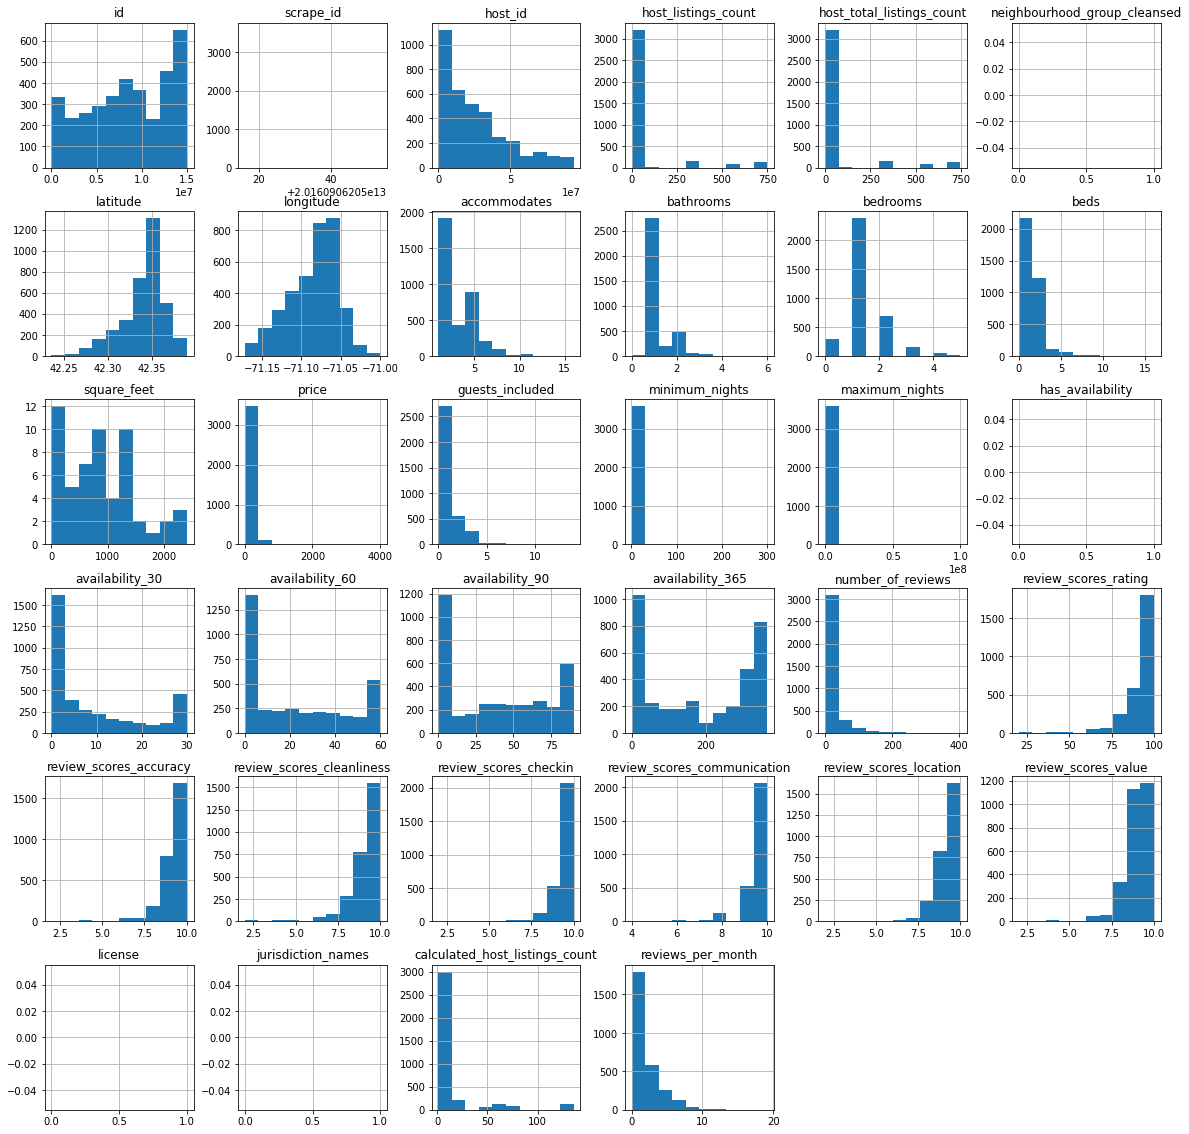

In [24]:
#plt.figure(figsize=(20,20));
boston_listing.hist(figsize=(20,20));

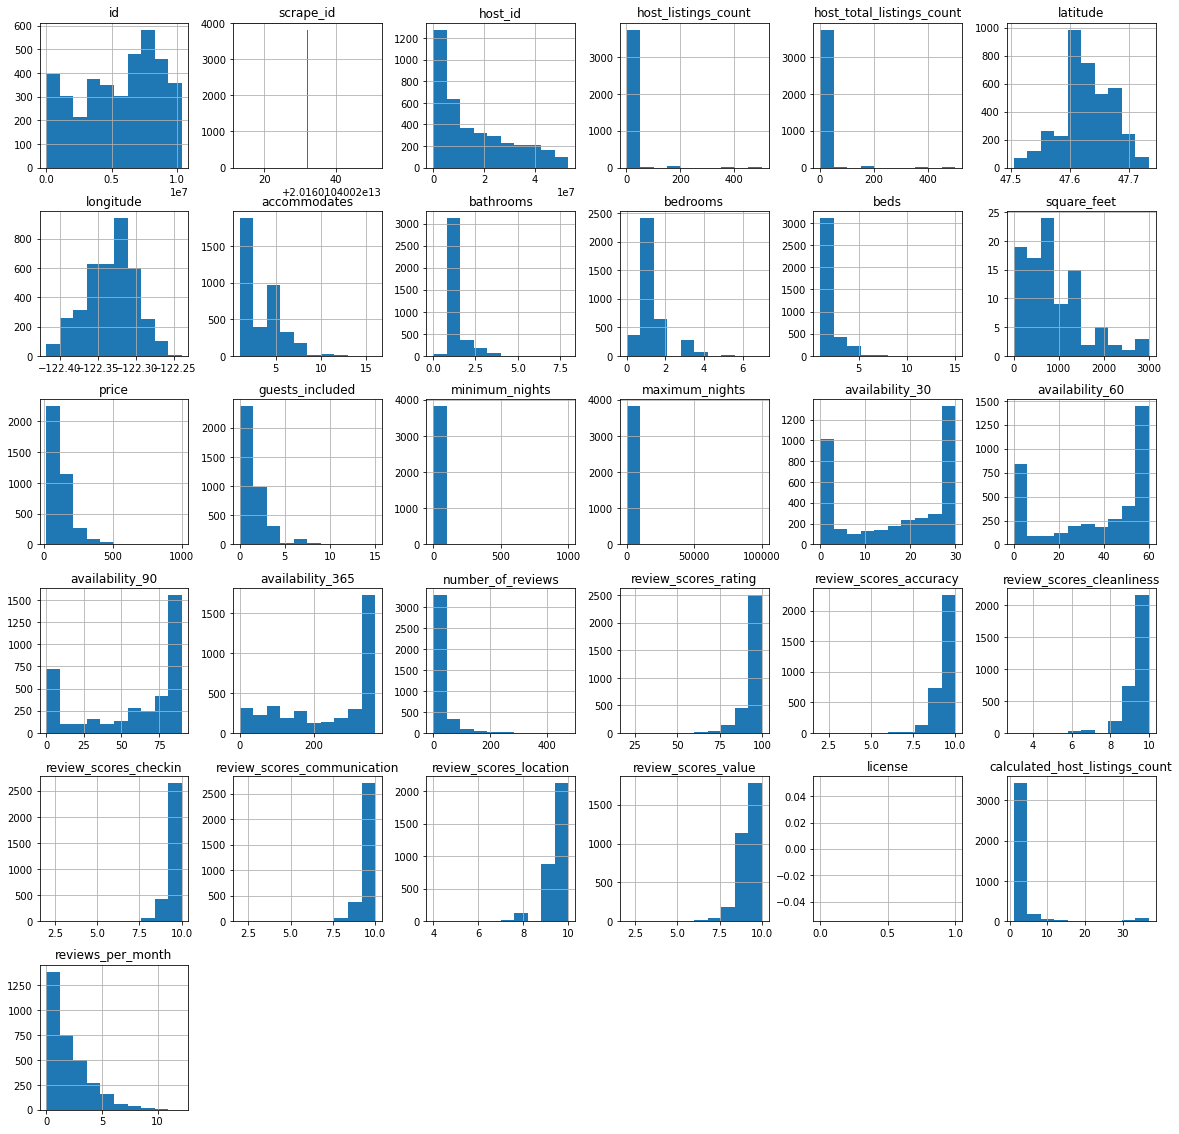

In [25]:
seattle_listing.hist(figsize=(20,20));

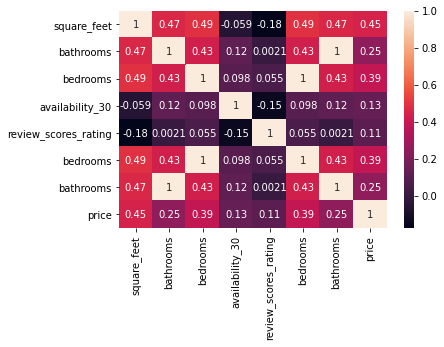

In [26]:
sns.heatmap(boston_listing[["square_feet","zipcode","bathrooms","bedrooms","availability_30","review_scores_rating","bedrooms","bathrooms","price"]].corr(),annot=True);

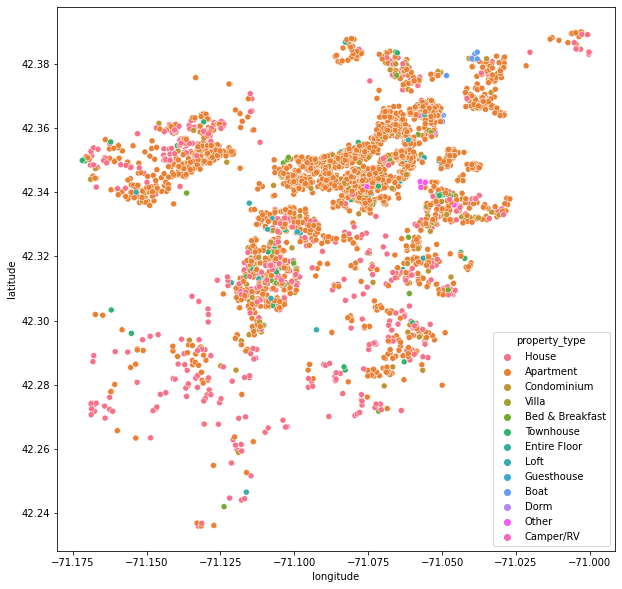

In [27]:
plt.figure(figsize=(10,10))
sns.scatterplot(data = boston_listing, y = 'latitude', x = 'longitude',hue = 'property_type');
#plt.scatter(boston_listing['longitude'], boston_listing['latitude'], c=boston_listing["price"], s=75, cmap="PuRd")

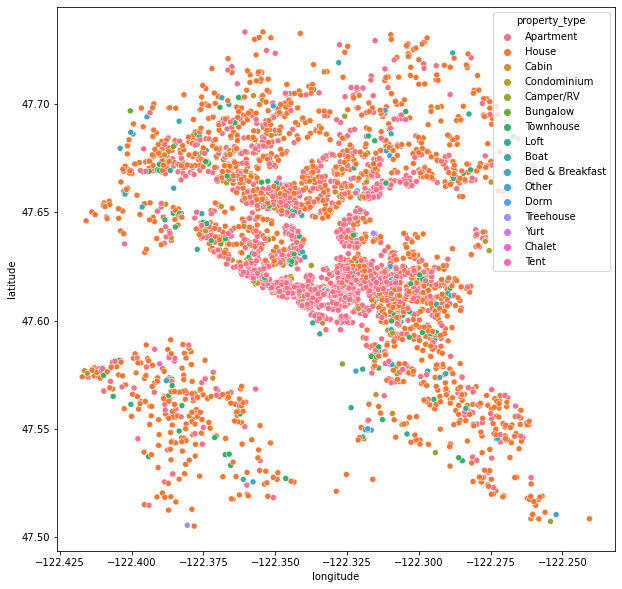

In [28]:
plt.figure(figsize=(10,10))
sns.scatterplot(data = seattle_listing, y = 'latitude', x = 'longitude',hue = 'property_type');

In [29]:
boston_listing.groupby(["bedrooms"]).mean()["price"]

bedrooms
0.0    154.668990
1.0    136.285834
2.0    258.753247
3.0    316.419355
4.0    389.400000
5.0    429.000000
Name: price, dtype: float64

In [30]:
seattle_listing.groupby(["bedrooms"]).mean()["price"]

bedrooms
0.0    103.548387
1.0     95.706247
2.0    174.062500
3.0    249.530035
4.0    313.695652
5.0    441.000000
6.0    578.166667
7.0    375.000000
Name: price, dtype: float64

In [31]:
boston_listing.groupby(["zipcode"]).mean()["availability_30"].sort_values()

zipcode
02163           0.333333
02108 02111     1.000000
02142           2.000000
02134-1704      3.000000
02113           3.772277
02472           4.000000
02108           5.069444
02109           5.705882
02130           6.199396
02134           6.280172
02141           6.666667
02118           6.890688
02129           7.111111
02446           7.375000
02115           7.491124
02135           7.494186
02120           7.617391
02127           7.650000
02136           7.862069
02125           7.945736
02445           8.000000
02138           8.166667
02119           8.610000
02114           9.251082
02116           9.412371
02121           9.586207
02122           9.909091
02218          10.000000
02131          10.061538
02124          10.200000
02128          10.472603
02467          11.800000
02126          11.958333
02132          12.135135
02111          12.727273
02145          12.833333
02215          14.394068
02210          15.120000
02110          15.307692
02139          21

In [32]:
boston_listing.groupby(["zipcode"]).mean()["price"].sort_values()

zipcode
02169           25.000000
02186           50.000000
02472           60.000000
02134-1704      80.000000
02467           80.400000
02126           80.958333
02124           81.200000
02163           86.666667
02136           88.793103
02145           89.833333
02445           92.800000
02125           95.527132
02143           95.571429
02131           96.907692
02121          101.310345
02132          103.783784
02134          108.836207
02122          114.409091
02128          119.684932
02135          120.395349
02119          126.110000
02120          126.173913
02130          138.746224
02141          150.000000
02218          169.000000
02446          178.500000
02127          189.938889
02113          190.158416
02139          190.166667
02115          195.065089
02114          213.238095
02118          217.789474
02138          221.500000
02129          221.844444
02215          225.546610
02116          229.180412
02108          230.361111
02109          238.941176
0211

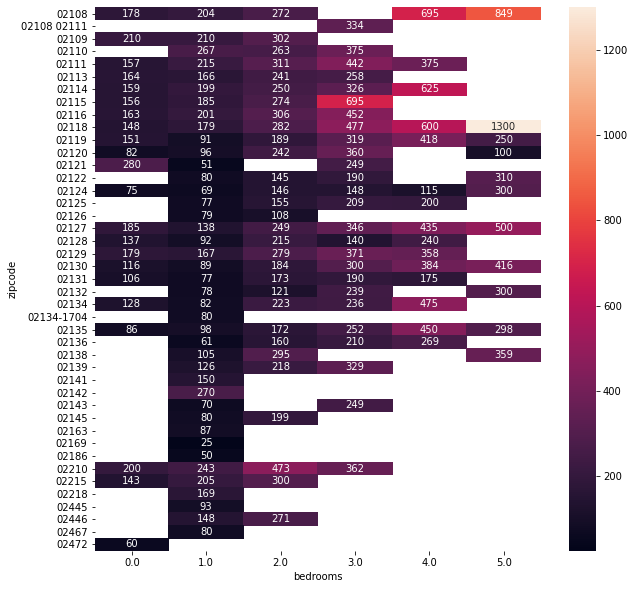

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(boston_listing.groupby(["zipcode","bedrooms"]).price.mean().unstack(),fmt = '.0f',annot = True);

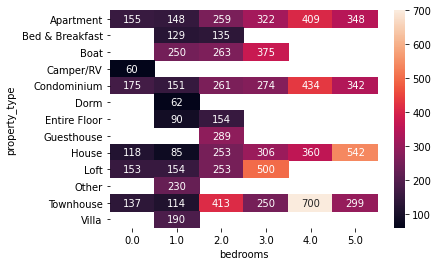

In [34]:
sns.heatmap(boston_listing.groupby(["property_type","bedrooms"]).price.mean().unstack(),fmt = '.0f',annot = True);

<AxesSubplot:xlabel='property_type'>

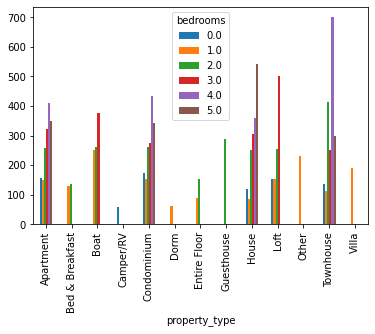

In [35]:
boston_listing.groupby(["property_type","bedrooms"]).price.mean().unstack().plot(kind='bar')

<Figure size 1440x1440 with 0 Axes>

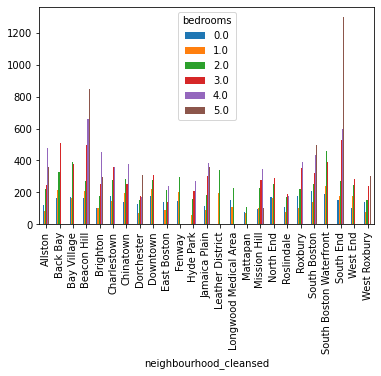

In [36]:
plt.figure(figsize=(20,20));
boston_listing.groupby(["neighbourhood_cleansed","bedrooms"]).price.mean().unstack().plot(kind='bar');


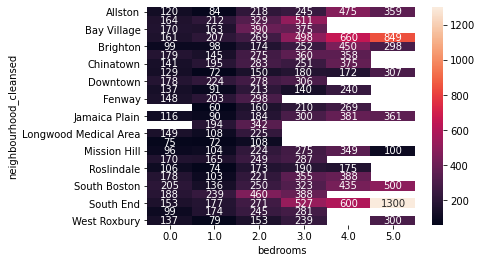

In [37]:
sns.heatmap(boston_listing.groupby(["neighbourhood_cleansed","bedrooms"]).price.mean().unstack(),fmt = '.0f',annot = True);

In [38]:
type(boston_listing["neighbourhood_cleansed"][0])

str

In [39]:
boston_listing.groupby(["bedrooms"]).price.mean()
# subtract by neighbourhood

bedrooms
0.0    154.668990
1.0    136.285834
2.0    258.753247
3.0    316.419355
4.0    389.400000
5.0    429.000000
Name: price, dtype: float64

In [40]:
boston_listing[["longitude","latitude"]].describe()

,longitude,latitude
count,3585.000000,3585.000000
mean,-71.084818,42.340032
std,0.031565,0.024403
min,-71.171789,42.235942
25%,-71.105083,42.329995
50%,-71.078429,42.345201
75%,-71.062155,42.354685
max,-71.000100,42.389982


In [41]:
boston_review.describe()

,listing_id,id,reviewer_id
count,6.827500e+04,6.827500e+04,6.827500e+04
mean,4.759910e+06,5.246516e+07,2.802389e+07
std,3.788990e+06,2.790991e+07,2.234097e+07
min,3.353000e+03,1.021000e+03,1.430000e+02
25%,1.458081e+06,3.010420e+07,9.001346e+06
50%,4.080000e+06,5.223121e+07,2.305179e+07
75%,7.377034e+06,7.663248e+07,4.213454e+07
max,1.484378e+07,9.999045e+07,9.335034e+07


In [42]:
boston_review.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [171]:
boston_calendar.head()

,listing_id,date,available,price,year,month
0,12147973,2017-09-05,f,NaN,2017,9
1,12147973,2017-09-04,f,NaN,2017,9
2,12147973,2017-09-03,f,NaN,2017,9
3,12147973,2017-09-02,f,NaN,2017,9
4,12147973,2017-09-01,f,NaN,2017,9


In [176]:
boston_calendar_with_price.groupby(['month_year']).available.count()

month_year
2016-09    24401
2016-10    46345
2016-11    58888
2016-12    60997
2017-01    63181
2017-02    56810
2017-03    55181
2017-04    51382
2017-05    53600
2017-06    52731
2017-07    54963
2017-08    55561
2017-09     8997
Name: available, dtype: int64

In [242]:
boston_calendar['month_year'] = boston_calendar.apply(lambda x: x['date'][:-3],axis=1)

seattle_calendar['month_year'] = seattle_calendar.apply(lambda x: x['date'][:-3],axis=1)

In [195]:
boston_calendar_with_price = boston_calendar.dropna(subset=["price"],axis=0).copy()
seattle_calendar_with_price = seattle_calendar.dropna(subset=["price"],axis=0).copy()

In [60]:
boston_calendar_with_price["year"] = pd.DatetimeIndex(boston_calendar_with_price['date']).year
boston_calendar_with_price["month"] = pd.DatetimeIndex(boston_calendar_with_price['date']).month

In [222]:
boston_calendar_with_price["price"] = boston_calendar_with_price["price"].apply(str_to_float) 
seattle_calendar_with_price["price"] = seattle_calendar_with_price["price"].apply(str_to_float)

In [196]:
boston_calendar_with_price['month_year'] = boston_calendar_with_price.apply(lambda x: x['date'][:-3],axis=1)
seattle_calendar_with_price['month_year'] = seattle_calendar_with_price.apply(lambda x: x['date'][:-3],axis=1)

In [143]:
boston_calendar_with_price['date'].iloc[0][:-3]

'2017-08'

In [116]:
df = boston_calendar_with_price[boston_calendar_with_price['listing_id'] == 3075044].groupby(["month_year_id","month_year"]).price.mean()

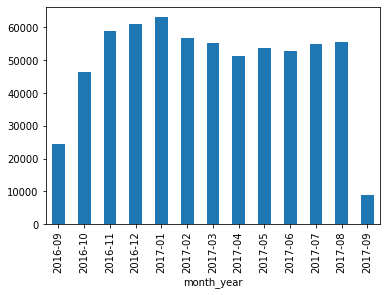

In [170]:
boston_calendar_with_price.groupby(['month_year']).available.count().dropna().plot(kind="bar",legend=False);

In [243]:
one_hot = pd.get_dummies(boston_calendar['available'])
boston_calendar = boston_calendar.join(one_hot)

In [205]:



one_hot = pd.get_dummies(seattle_calendar['available'])
seattle_calendar = seattle_calendar.join(one_hot)

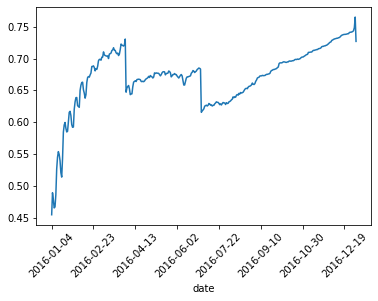

In [247]:
seattle_calendar.groupby(['date']).t.mean().plot();
plt.xticks(rotation=45);

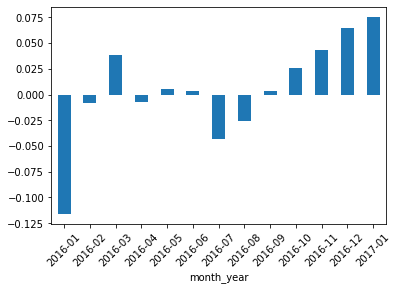

In [261]:
(seattle_calendar.groupby(['month_year']).t.mean()-seattle_calendar.t.mean()).plot(kind = 'bar');
plt.xticks(rotation=45);

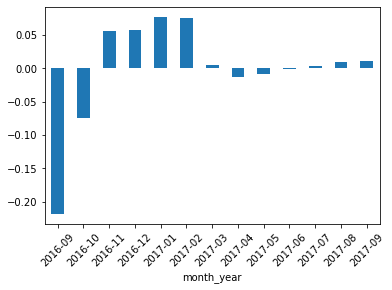

In [252]:
(boston_calendar.groupby(['month_year']).t.mean()-boston_calendar.t.mean()).plot(kind = 'bar');
plt.xticks(rotation=45);

In [249]:
boston_calendar.t.mean()

0.4912842179251121

In [213]:
seattle_calendar.groupby('month_year').f.mean()

month_year
2016-01    0.445867
2016-02    0.337792
2016-03    0.290813
2016-04    0.336153
2016-05    0.324330
2016-06    0.325616
2016-07    0.372903
2016-08    0.354949
2016-09    0.325598
2016-10    0.303486
2016-11    0.286014
2016-12    0.264427
2017-01    0.253798
Name: f, dtype: float64

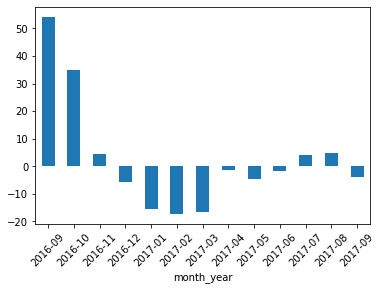

In [228]:
(boston_calendar_with_price.groupby(["month_year"]).price.mean()-boston_calendar_with_price.price.mean()).plot(kind="bar");
plt.xticks(rotation=45);

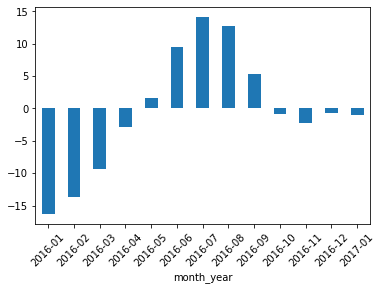

In [227]:
(seattle_calendar_with_price.groupby(["month_year"]).price.mean()-seattle_calendar_with_price.price.mean()).plot(kind="bar");
plt.xticks(rotation=45);

## Which is cheaper for travelling? Boston(east coast) or Seattle(west coast),When Should you travel

## Most popular area

## recomended housing

# Estimated price

In [223]:
seattle_calendar_with_price.price.mean()

137.94485855103355

In [229]:
boston_calendar_with_price.price.mean()

198.43890942511862

In [224]:
seattle_calendar_with_price.groupby(["month_year"]).price.mean()

month_year
2016-01    121.568409
2016-02    124.293927
2016-03    128.644488
2016-04    135.097005
2016-05    139.538183
2016-06    147.473137
2016-07    152.094150
2016-08    150.656594
2016-09    143.255949
2016-10    137.031939
2016-11    135.688738
2016-12    137.251835
2017-01    136.882590
Name: price, dtype: float64

In [234]:
seattle_calendar_with_price[seattle_calendar_with_price['month_year'] != '2017-01'].price.mean()

137.95137504252597

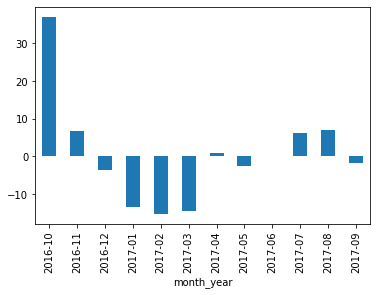

In [238]:
(boston_calendar_with_price[boston_calendar_with_price['month_year'] != '2016-09'].groupby(["month_year"]).price.mean()-boston_calendar_with_price[boston_calendar_with_price['month_year'] != '2016-09'].price.mean()).plot(kind="bar");

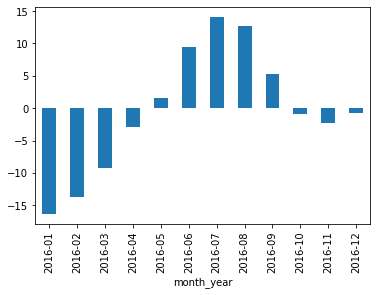

In [240]:
(seattle_calendar_with_price[seattle_calendar_with_price['month_year'] != '2017-01'].groupby(["month_year"]).price.mean()-seattle_calendar_with_price[seattle_calendar_with_price['month_year'] != '2017-01'].price.mean()).plot(kind="bar");